# Sea Level Predictor

Summary: The sea level predictor analyzes sea level data from 1880 to 2013. The data is presented in a scratter plot with two linear regression lines. The linear regression lines are based on two time intervals. The red linear regression line is based on data from 1880 to 2013, while the blue linear regression line is based on data from 2000 to 2013. The data from 2000 to 2013 suggests that the sea level is rising at rate that is 164% higher than the rate the sea level increased from 1880 to 2013. This results in the sea level being approximately 5.21 inches higher in 2050 than if the trend from 1880 to 2013 continued. If the trend from 2000 to 2013 continues until 2050, the sea level will have risen more in the 50 years from 2000 to 2050 than it did in the 120 years from 1880 to 2000.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Import CSV file

In [2]:
df = pd.read_csv('epa-sea-level.csv')

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Create scatter plot with 'CSIRO Adjusted Sea Level' on X and 'Year' on Y. Then add linear regression line to predict sea level out to 2050.

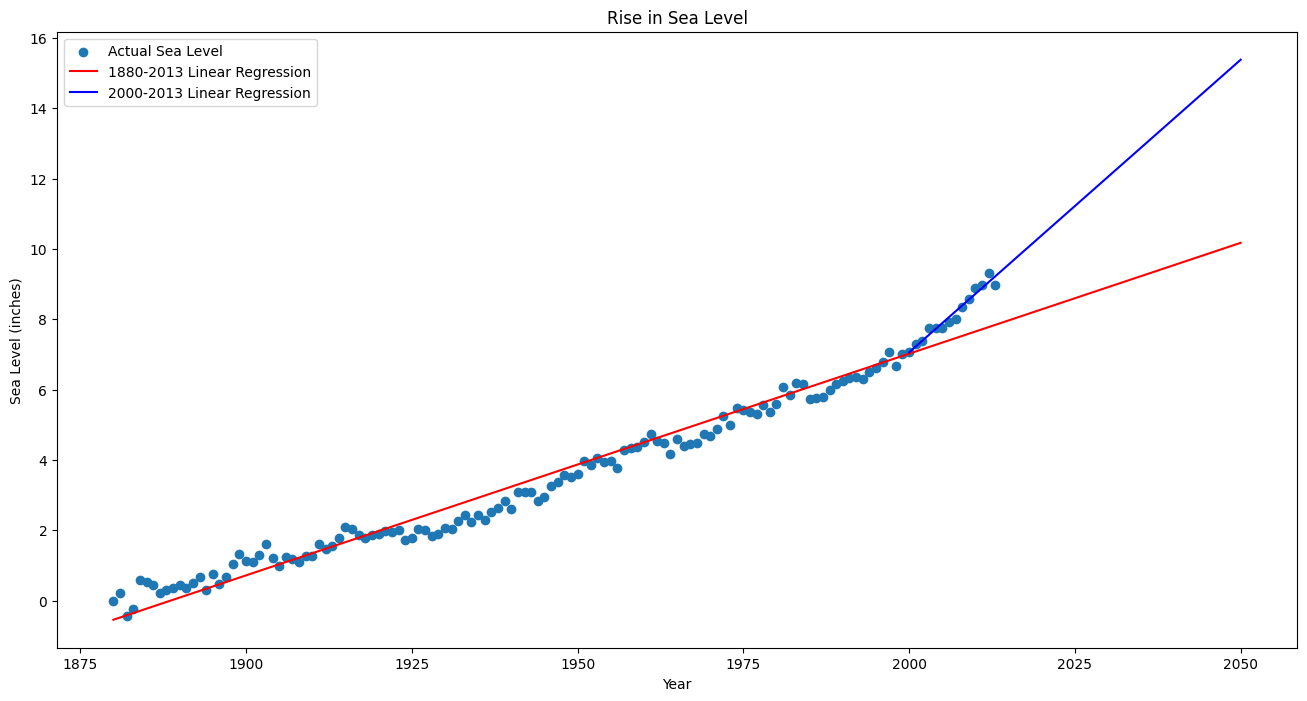

In [3]:
# Scatter plot of original data
y = df['CSIRO Adjusted Sea Level']
x = df['Year']

fig, ax = plt.subplots(figsize=(16, 8))
plt.scatter(x, y,)
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

# linear regession line using data from 1880-2013
res = linregress(x, y)
x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = res.slope*x_pred + res.intercept
plt.plot(x_pred, y_pred, 'r')

# linear regression line using data from 2000-2013
df2 = df[(df['Year'] >= 2000)]
y2 = df2['CSIRO Adjusted Sea Level']
x2 = df2['Year']

res2 = linregress(x2, y2)
x2_pred = pd.Series([i for i in range(2000, 2051)])
y2_pred = res2.slope*x2_pred + res2.intercept
plt.plot(x2_pred, y2_pred, 'b')

# legend
ax.legend(['Actual Sea Level', '1880-2013 Linear Regression', '2000-2013 Linear Regression'])

The chart above shows the sea level in inches from 1880 to 2013. Using the acutal data, we created two linear regression lines. The red line is the linear regression line using the data from 1880 to 2013. The blue line is the linear regression line using data from 2000 to 2013. As you can see, the data from 2000 to 2013 suggests that the sea level is rising at an increased rate compared to the 140+ year trend dating back to 1880. 

In [4]:
# slope of data from 1880-2013
res.slope

0.06304458401213482

In [5]:
# slope of data from 2000-2013
res2.slope

0.1664272733318682

In [6]:
# percent increase in the rate of sea level rise per year
(((res2.slope / res.slope) - 1) * 100).round()

164.0

The slope of the linear regression line from 2000 to 2013 tells us the sea level is rising about 0.16 inches per year. This is over 0.1 inches higher than the rate the sea level rose from 1880 to 2013, which is an increase of 164%. 

In [7]:
# Sea level by 2050 based on 2000 to 2013 linear regression
sea_level_2050 = res2.slope*2050 + res2.intercept

sea_level_2050.round(decimals=2)

15.38

In [8]:
# Sea Level in year 2000
sea_level_2000 = df['CSIRO Adjusted Sea Level'].loc[df['Year'] == 2000].round(decimals=2)

sea_level_2000

120    7.06
Name: CSIRO Adjusted Sea Level, dtype: float64

In [9]:
# calculate the difference in sea level by 2050 based on the 2000-2013 trend line compared to the 1880-2013 trend line
dif_sea_level = (sea_level_2050 - (res.slope*2050 + res.intercept))

dif_sea_level.round(decimals=2)

5.21

In [10]:
# Calculate the number of inches the sea level is expected to rise from 2000 to 2050 based on the 2000-2013 trend line
sea_level_increase = sea_level_2050 - sea_level_2000

sea_level_increase.round(decimals=2)

120    8.32
Name: CSIRO Adjusted Sea Level, dtype: float64

Overall, the data suggests that the rate at which the sea level is rising has increased significantly since 2000. It will be important to continue monitoring the sea level data over the next few years to see if the rate the sea level rose from 2000-2013 holds steady, rises at a faster rate, or reverts back to 140+ year trend. If the trend line from 2000-2013 continues to 2050, the CSIRO Adjusted Sea Level is expected to be around 15.38 inches. This is approximately 5.21 inches higher than if the trend from 1880-2013 continued until 2050. Additionally, the trend line based on 2000-2013 sea level data suggests that the sea level will rise more in the 50 years from 2000 to 2050 than it did in the 120 years from 1880 to 2000.